In [2]:
import pandas as pd
import numpy as np
#!pip3 install filterpy # Uncheck this the first time you run the code
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt
%matplotlib notebook
import datetime
import time

In [3]:
obs = pd.read_pickle("./haloween_v0.pkl")
# obs = obs[ (obs['rgt']==344)]
pd.set_option('display.max_rows', 10)
obs

,x-centroid,y-centroid,width,time,rgt,azimuth
3,-672288.477228,1.445694e+06,0.000000,2019-11-13 09:51:20.109950+00:00,725,-171.124298
6,-668846.403178,1.445477e+06,39.356192,2019-11-13 09:51:20.109950+00:00,725,-171.108269
7,-665281.256852,1.433032e+06,0.000000,2019-11-13 09:51:20.109950+00:00,725,-171.053024
8,-664988.547349,1.432010e+06,0.000000,2019-11-13 09:51:20.109950+00:00,725,-171.048447
9,-664287.302343,1.429582e+06,1593.328641,2019-11-13 09:51:20.109950+00:00,725,-171.037521
...,...,...,...,...,...,...
1974,-694368.776919,1.426979e+06,413.245485,2018-11-19 03:03:53.403728+00:00,786,-171.089668
1978,-688411.207710,1.429925e+06,354.162823,2018-11-19 03:03:53.403728+00:00,786,-171.082405
1979,-688294.026637,1.429539e+06,98.377696,2018-11-19 03:03:53.403728+00:00,786,-171.080673
1980,-691336.500400,1.428094e+06,432.585023,2018-11-19 03:03:53.403728+00:00,786,-171.079124


<IPython.core.display.Javascript object>


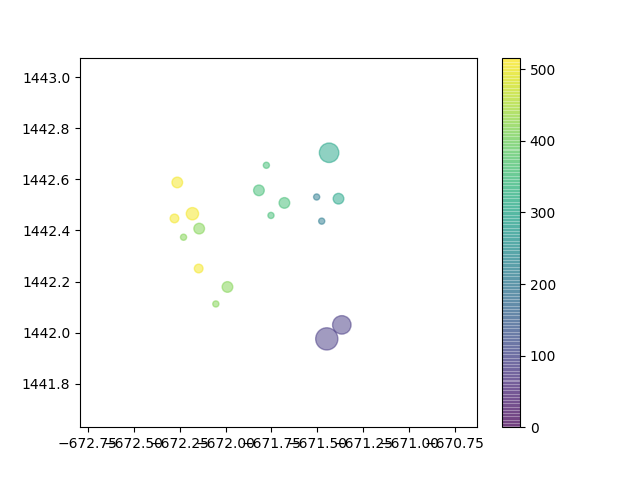

In [4]:

fig,ax=plt.subplots()
times = pd.to_datetime(obs['time']).astype(int)/ 10**9
time_func = (times-min(abs(times))) / 86400
sc=plt.scatter(obs['x-centroid']/1e3,obs['y-centroid']/1e3,c=time_func,s=obs['width'],alpha=0.5)
plt.set_cmap('viridis')
fig.colorbar(sc)
